First we upload the two dataset of the sign mnist


In [19]:
import pandas as pd
from scipy.stats import skew


# Load the dataset
dataset = pd.read_csv('sign_mnist_train.csv')
dataset.info()
print("Number of samples:", dataset.shape[0])
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB
Number of samples: 27455


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [20]:
# Count the number of images per class
class_counts = dataset['label'].value_counts().sort_index()


# Compute the skew

skew2 = 3*(class_counts.mean() - class_counts.median()) / class_counts.std()
skew = class_counts.std() / class_counts.mean()
print(f"Number of classes: {len(class_counts)}")
print(f"Class distribution:\n{class_counts}")
print(f"Skew:{skew2} and {skew}")
dataset.skew()

# 3 * (mean–median) / standard deviation = skew

Number of classes: 24
Class distribution:
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64
Skew:-0.43129847690785494 and 0.0732183141355446


label      -0.095249
pixel1     -0.558068
pixel2     -0.577706
pixel3     -0.645864
pixel4     -0.772380
              ...   
pixel780   -0.916529
pixel781   -0.954015
pixel782   -0.947602
pixel783   -0.952318
pixel784   -0.930335
Length: 785, dtype: float64

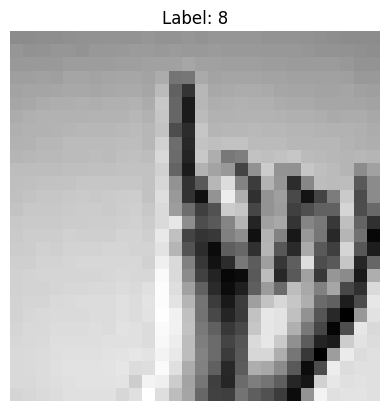

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def show_image(dataset, index):
    image = dataset.iloc[index, 1:].values.reshape(28, 28)
    label = dataset.iloc[index, 0]

    plt.imshow(image, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Usage example:
show_image(dataset, 6)

The best ML model to classify these image should be the random forest deicsion tree or the KNN

K Nearest Neighbors (KNN): KNN is a simple and intuitive classification algorithm that assigns labels to data points based on the labels of their nearest neighbors in the feature space. KNN can be a reasonable choice for this task, as it can capture local patterns in the image data. However, KNN might not scale well to large datasets and can be sensitive to irrelevant features. Given the size of the Sign Language MNIST dataset, KNN can be a viable option to consider.


1. Data cleaning and preprocessing;
2. select a dataset;
3. split into train and test;
4. fit a Sklearn model on the training data;
5. test the accuracy of the learned model on the test data.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'n_neighbors': 3}
0.994330263663894


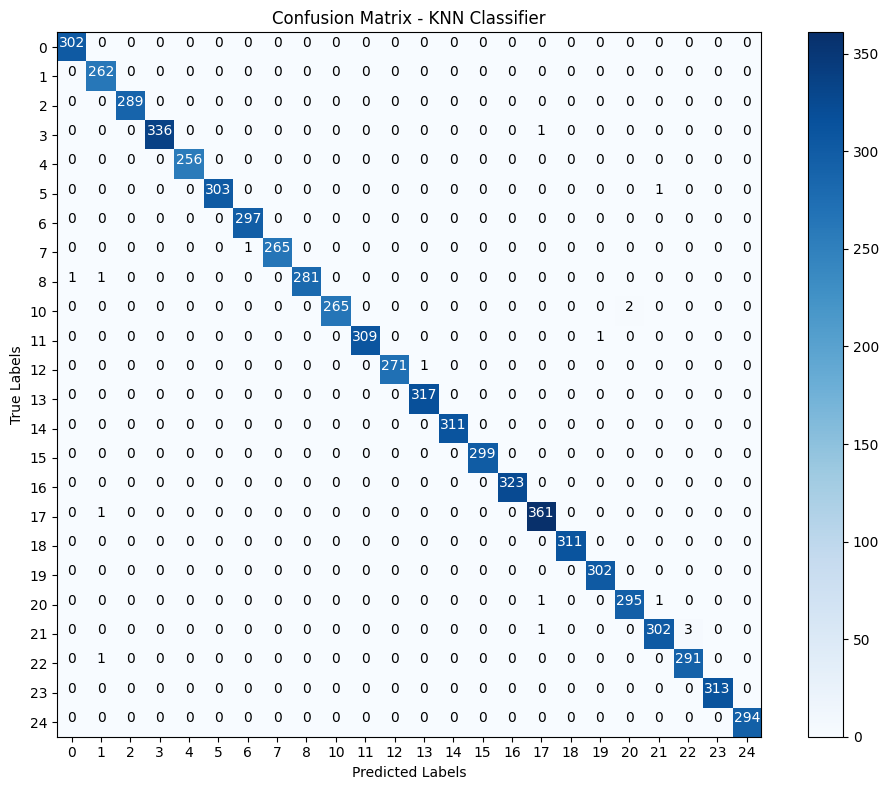

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize

# load the dataset
dataset = pd.read_csv('sign_mnist_train.csv')


# Split the data into training and validation sets
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7172, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a KNN classifier
param_grid = {'n_neighbors': [3, 7 ,9 ,11]}
kf = StratifiedKFold(n_splits= 5)
KNN_model = KNeighborsClassifier()
knn_grid = GridSearchCV(KNN_model, param_grid, n_jobs=-1, cv=kf, verbose=4)
knn_grid.fit(X_train, y_train)
print(knn_grid.best_params_)
print(knn_grid.best_score_)

y_pred = knn_grid.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - KNN Classifier')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Add labels to each cell
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

Using MLP Classifier (Ex. 6) MLP stands for Multilayer-layer Perceptron. It is a type of neural-network consisting in multiple layers made up of multiple neurons. Each connection between neurons has a weight and a particular function is used to change this value which is used a criterion for the network to map input data to the output.

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, precision_recall_curve
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7172, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train_scaled, y_train)

#prints the label for the predicted classes
y_pred = np.array(clf.predict(X_test_scaled))
print("Predicted classes:" , y_pred)

#returns the mean accuracy for this classifier
print("Mean accuracy:", clf.score(X_test_scaled, y_test))

#Weighted F1 score for the MLP model
f1_clf = f1_score(y_test, y_pred, average='weighted')
print("MLP F1 score:", f1_clf)


Predicted classes: [15  0 15 ...  3 21 23]
Mean accuracy: 0.9997211377579476
MLP F1 score: 0.9997212348983974


K-means (ex 9)

F1 measure: 0.15009050048647585


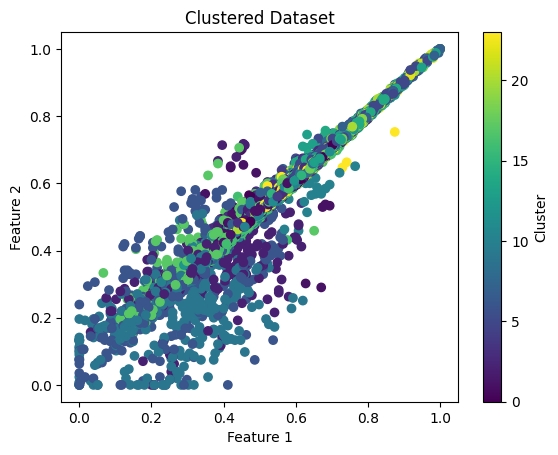

In [46]:
from sklearn.cluster import KMeans

k= 24
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X_train_scaled)
cluster_labels = kmeans.predict(X_train_scaled)
y_assigned = np.zeros_like(cluster_labels)
for cluster in range(k):
    mask = (cluster_labels == cluster)
    assigned_class = np.bincount(y_train[mask]).argmax()
    y_assigned[mask] = assigned_class

f1 = f1_score(y_train, y_assigned, average='weighted')
print("F1 measure:", f1)

plt.scatter(X_train_scaled[:, 1], X_train_scaled[:, 2], c=cluster_labels, cmap='viridis')
plt.title('Clustered Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

The Scatter plot considers only the first 2 features of our dataset. It is possible to deduce from it that the accuracy score for the k-means model we have is very low as instances are distributed more towards the middle of two features rather then in a precise place. Adapting the plot to other features also give quite similar results. This tells us that k-means is not a  very strong classifier for this dataset, even though we have scaled the set down.